In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [15]:
data=pd.read_csv('https://raw.githubusercontent.com/shantanu1109/IBM-HR-Analytics-Employee-Attrition-and-Performance-Prediction/main/DATASET/IBM-HR-Analytics-Employee-Attrition-and-Performance-Revised.csv')

In [16]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [17]:
data.shape

(1470, 31)

In [18]:
# dataset contains 1470 rows and 31 columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   object
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   object
 12  JobLevel                  1470 non-null   object
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [19]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [20]:
data['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# we can see that the target variable unique value is only two 'yes',and 'no' so this is a classification problem

In [21]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [22]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
# we can see that some imbalance present in the target column we will deal this issue later

In [23]:
# checking value counts in each column
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


No     1233
Yes     237
Name: Attrition, dtype: int64


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     2

In [24]:
# CHECKING FOR CATEGORICAL COLUMN 
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print('categorical column \n\n',categorical_col)
print('\n')
# checking contineous column
contineous_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        contineous_col.append(i)
print('contineous column\n\n',contineous_col)
print('\n')
        
        

categorical column 

 ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']


contineous column

 ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']




In [25]:
data.nunique().to_frame('No of unique values')

,No of unique values
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EnvironmentSatisfaction,4
Gender,2


In [26]:
data.describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,2.693197,15.209524,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,2.498009,3.659938,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# all columns count equel no missing value
# age ,monthly income column 75% and 100%  have huge defrence 
# data visualisation 
# visualise attrition count  in dataset

No     1233
Yes     237
Name: Attrition, dtype: int64


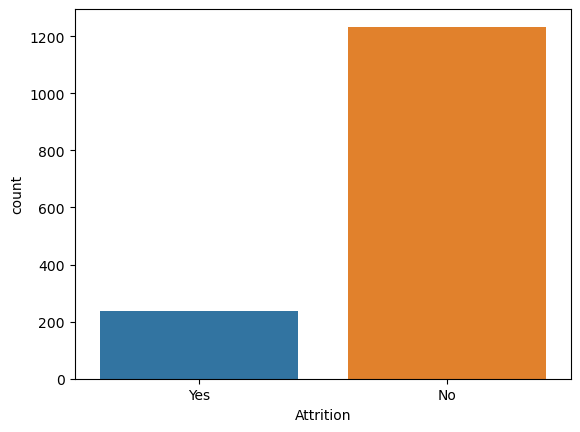

In [27]:
ax=sns.countplot(x='Attrition',data=data)
print(data['Attrition'].value_counts())

In [ ]:
# we can see that no Attrition count is very high compared to yes 
# this will lead to class imbalance we will deal this issue later

Male      882
Female    588
Name: Gender, dtype: int64


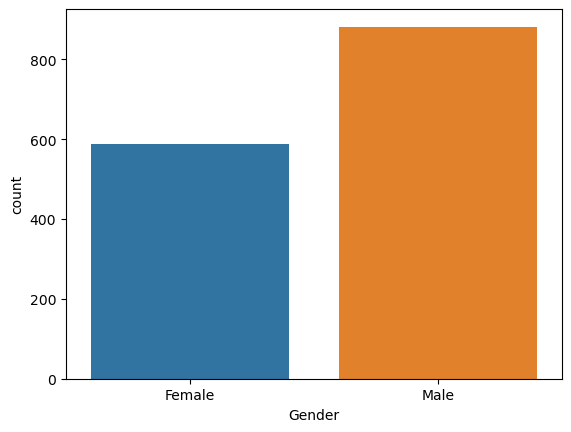

In [28]:
# visualise the gender count 
ax=sns.countplot(x='Gender',data=data)
print(data['Gender'].value_counts())

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


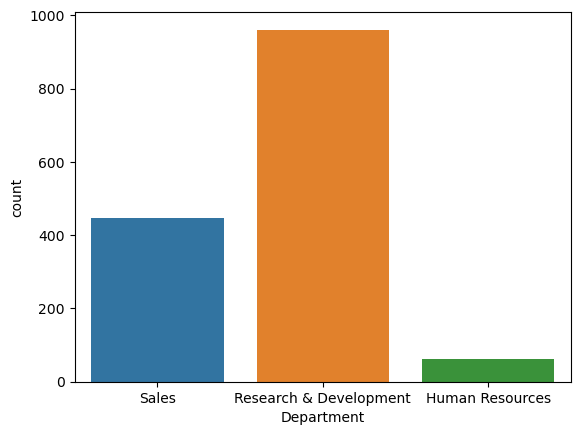

In [29]:
# we can see that male count higher than female count
# visualise  department count 
ax=sns.countplot(x='Department',data=data)
print(data['Department'].value_counts())

Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64


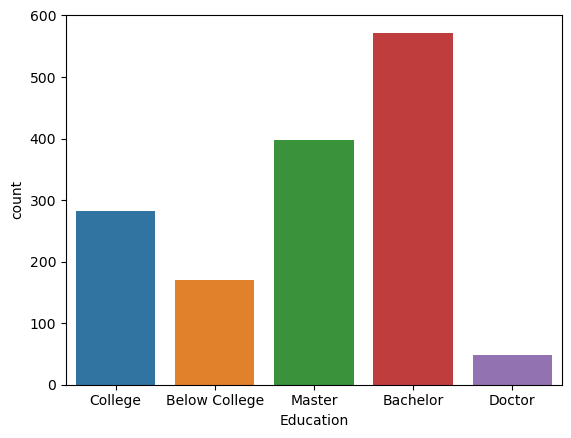

In [30]:
# Research and Develepment department count is higher compared to sales and Human resources
# visualise Education count
ax=sns.countplot(x='Education',data=data)
print(data['Education'].value_counts())

Very High    459
High         442
Low          289
Medium       280
Name: JobSatisfaction, dtype: int64


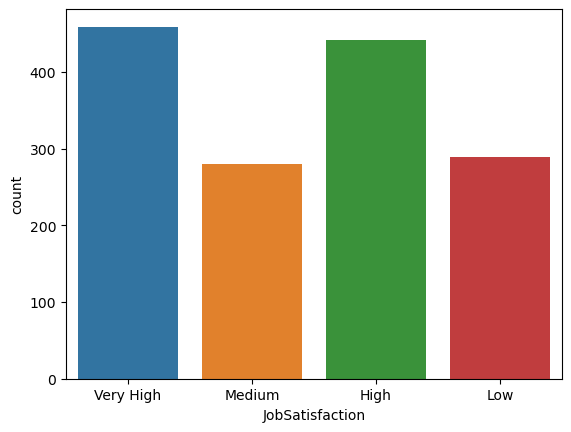

In [31]:
# bachelor count is high and doctor count is low
# visualise Jobsatisfaction
ax=sns.countplot(x='JobSatisfaction',data=data)
print(data['JobSatisfaction'].value_counts())

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


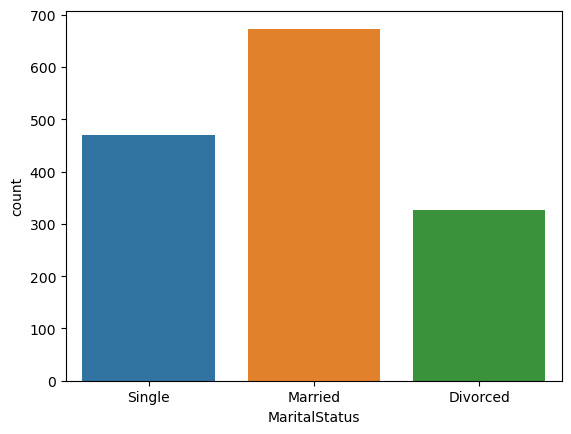

In [32]:
# jobsatisfaction very high and high count  almost equel 
# visualise MaritalStatus
ax=sns.countplot(x='MaritalStatus',data=data)
print(data['MaritalStatus'].value_counts())


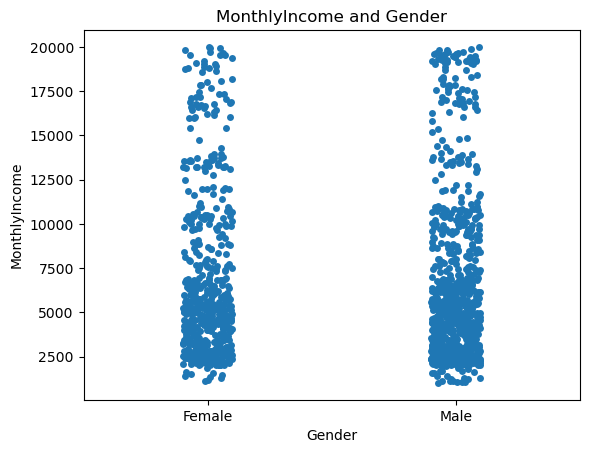

In [33]:
# marital status  married counts are high 
# compare total charges and gender
plt.title("MonthlyIncome and Gender")
sns.stripplot(x="Gender",y="MonthlyIncome",data=data)
plt.show()

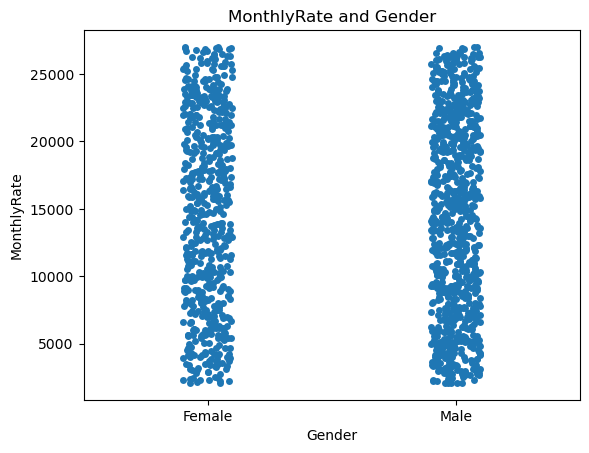

In [34]:
# compare  monthly rate and gender
plt.title("MonthlyRate and Gender")
sns.stripplot(x="Gender",y="MonthlyRate",data=data)
plt.show()

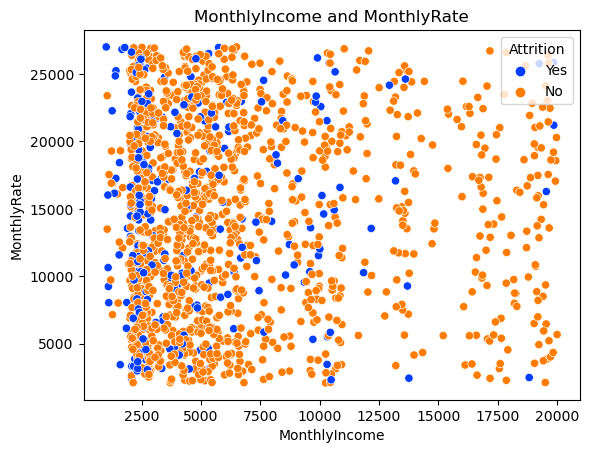

In [35]:
# compare monthly income and monthly rate with attrition
plt.title("MonthlyIncome and MonthlyRate")
sns.scatterplot(x="MonthlyIncome",y="MonthlyRate",data=data,hue='Attrition',palette='bright')
plt.show()

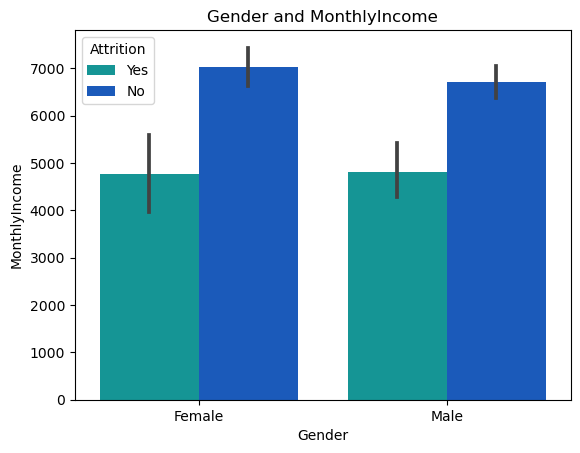

In [37]:
# we can see that monthly income increases attrition is very less and monthly rate increases attrition is high
# compare gender and monthlyincome on churn
plt.title("Gender and MonthlyIncome")
sns.barplot(x="Gender",y="MonthlyIncome",data=data,hue="Attrition",palette="winter_r")
plt.show()

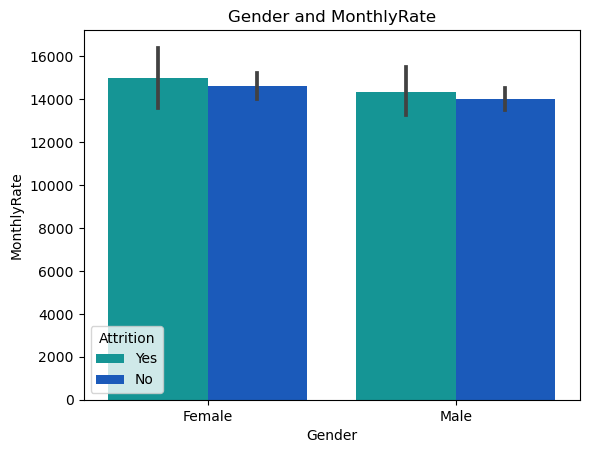

In [38]:
# we can see that for high salary attrition is less for both male and female
# compare gender and monthlyRate on attrition
plt.title("Gender and MonthlyRate")
sns.barplot(x="Gender",y="MonthlyRate",data=data,hue="Attrition",palette="winter_r")
plt.show()

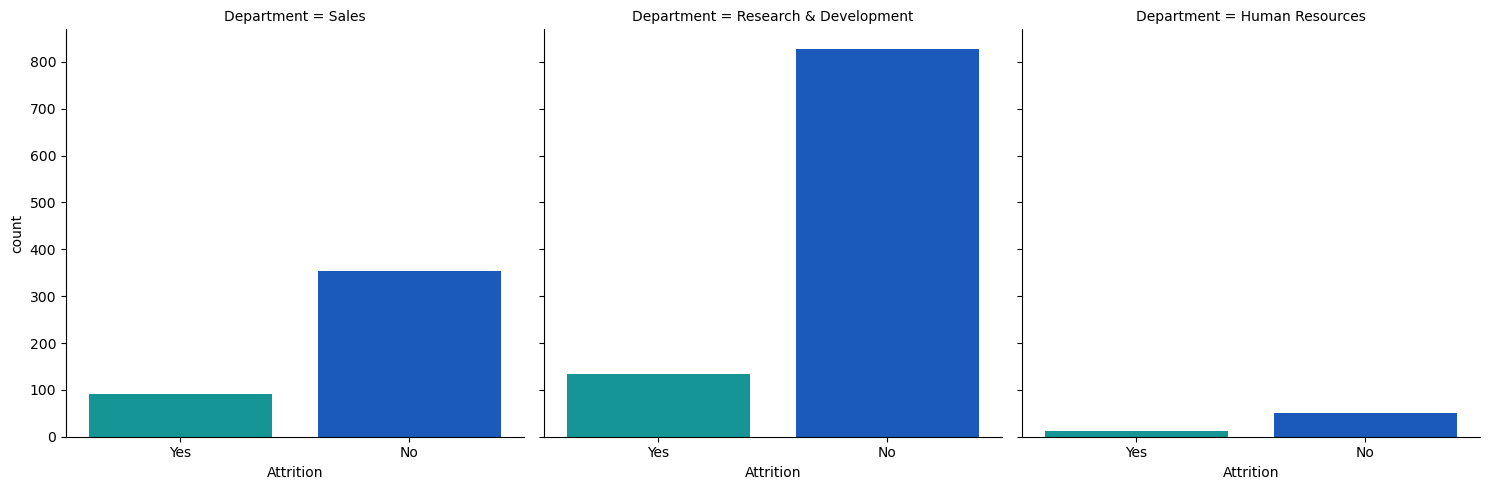

In [39]:
# compare attrition with departments

sns.catplot(x="Attrition",col="Department",data=data,kind="count",palette='winter_r')

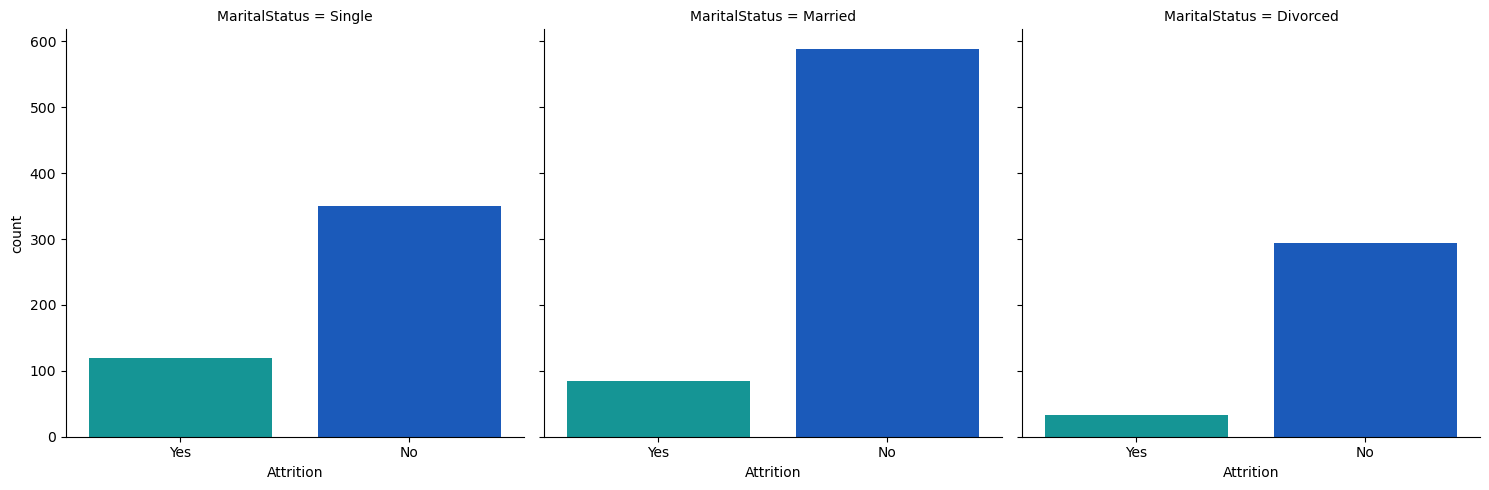

In [40]:
# visualise attrition level with marital status 
sns.catplot(x="Attrition",col="MaritalStatus",data=data,kind="count",palette='winter_r')

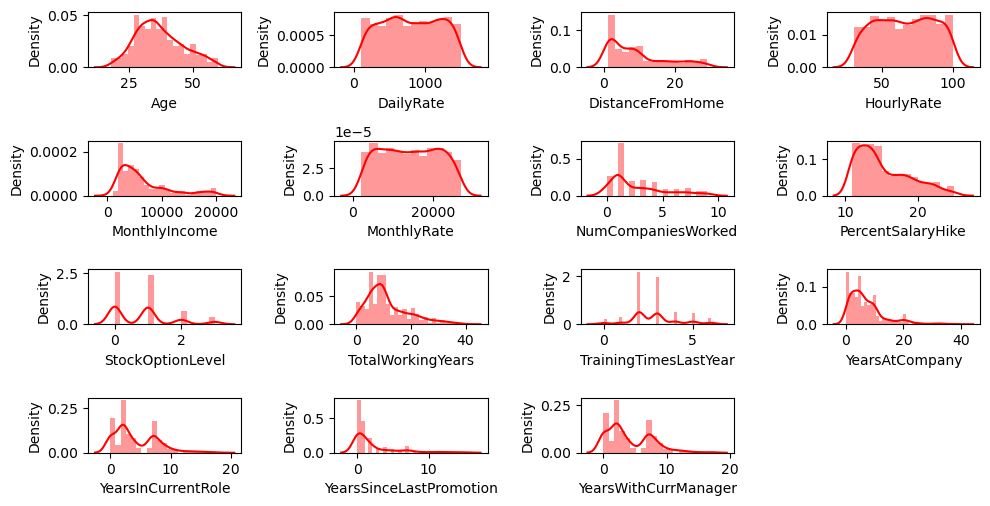

In [41]:
# check distribution of the data
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in contineous_col:
    if plotnumber<=20:
        plt.subplot(5,4,plotnumber)
        sns.distplot(data[col],color='r')
        plt.xlabel(col,fontsize=10)
        plotnumber +=1
plt.tight_layout()

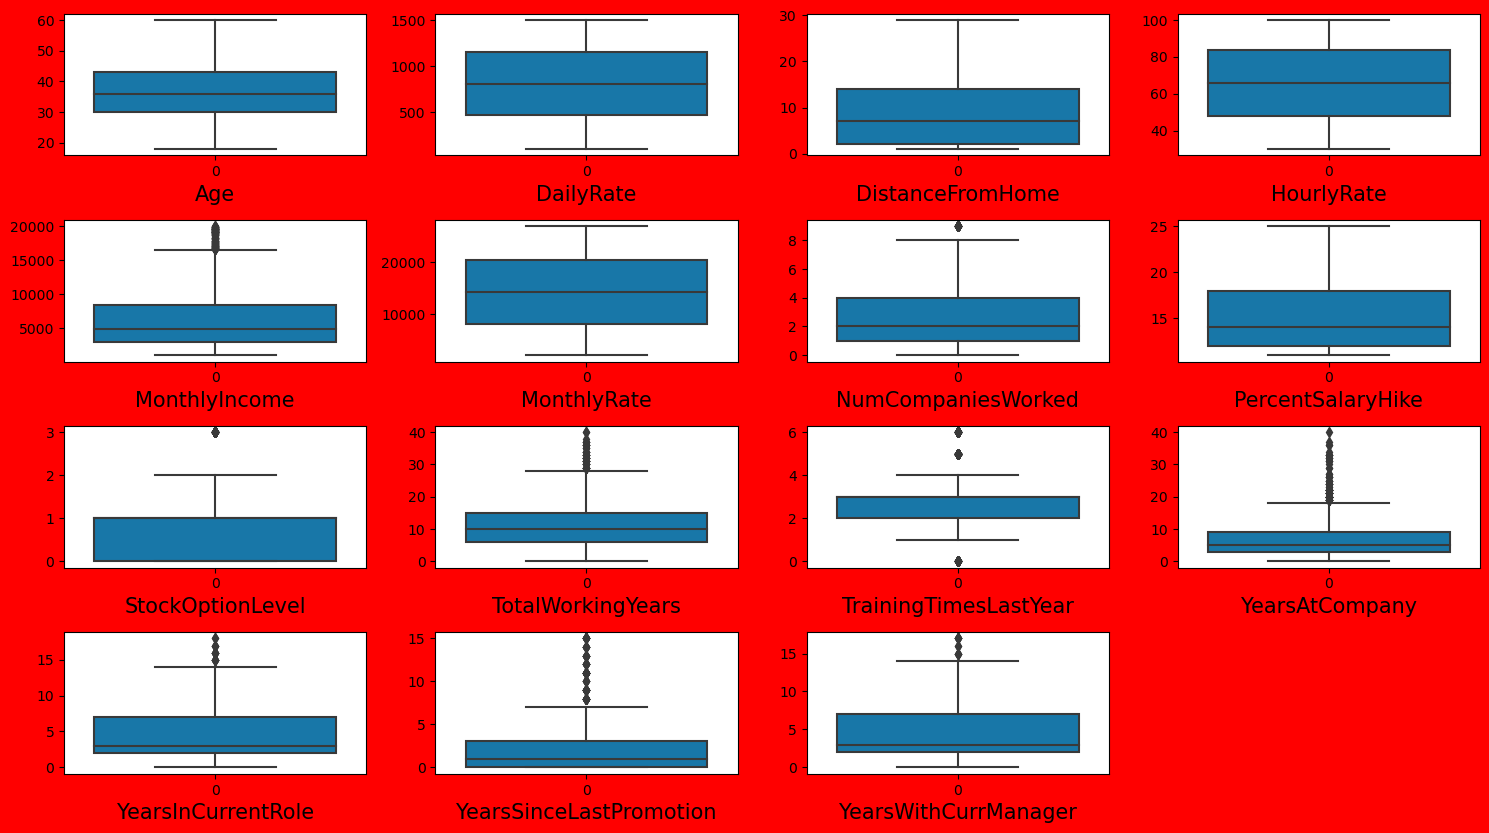

In [42]:
# check outliers in the dataset
plt.figure(figsize=(15,10),facecolor='red')
plotnumber=1
for col in contineous_col:
    if plotnumber<=20:
        plt.subplot(5,4,plotnumber)
        sns.boxplot(data[col],palette='winter_r')
        plt.xlabel(col,fontsize=15)
    plotnumber +=1
plt.tight_layout()

In [43]:
from scipy.stats import zscore
out_features=data[['MonthlyIncome']]
z=np.abs(zscore(out_features))
z

,MonthlyIncome
0,0.108350
1,0.291719
2,0.937654
3,0.763634
4,0.644858
...,...
1465,0.835451
1466,0.741140
1467,0.076690
1468,0.236474


In [47]:
np.where(z>2.5)

(array([  25,   29,   45,   62,  105,  123,  165,  186,  187,  190,  231,
         233,  237,  244,  257,  270,  279,  290,  326,  329,  392,  400,
         411,  473,  497,  535,  538,  568,  584,  595,  716,  741,  746,
         749,  766,  770,  814,  851,  858,  869,  898,  899,  913,  916,
         918,  922,  955,  956, 1009, 1116, 1126, 1129, 1140, 1154, 1242,
        1264, 1277, 1330, 1331, 1377, 1401, 1437, 1443], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int64))

In [49]:
z.iloc[1443,0]

2.629862871377339

In [50]:
data1=data[(z<2.5).all(axis=1)]

In [51]:
data1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [52]:
data1.shape

(1407, 31)

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

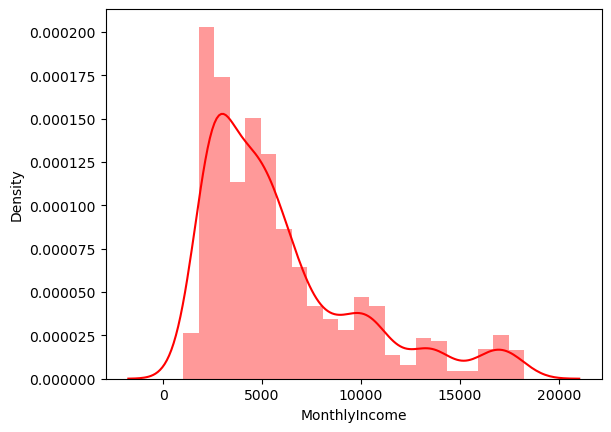

In [55]:
sns.distplot(data1['MonthlyIncome'],color='r')

In [56]:
# checking skewness
data1.skew()

Age                        0.468690
DailyRate                 -0.007551
DistanceFromHome           0.927221
HourlyRate                -0.040578
MonthlyIncome              1.345671
MonthlyRate                0.027445
NumCompaniesWorked         1.046921
PercentSalaryHike          0.806525
StockOptionLevel           0.968216
TotalWorkingYears          1.200468
TrainingTimesLastYear      0.563958
YearsAtCompany             1.724360
YearsInCurrentRole         0.862581
YearsSinceLastPromotion    2.027691
YearsWithCurrManager       0.853717
dtype: float64

In [57]:
# removing skewness with cuberoot method
data1['MonthlyIncome']=np.cbrt(data1['MonthlyIncome'])

In [58]:
data1.skew()

Age                        0.468690
DailyRate                 -0.007551
DistanceFromHome           0.927221
HourlyRate                -0.040578
MonthlyIncome              0.615478
MonthlyRate                0.027445
NumCompaniesWorked         1.046921
PercentSalaryHike          0.806525
StockOptionLevel           0.968216
TotalWorkingYears          1.200468
TrainingTimesLastYear      0.563958
YearsAtCompany             1.724360
YearsInCurrentRole         0.862581
YearsSinceLastPromotion    2.027691
YearsWithCurrManager       0.853717
dtype: float64

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

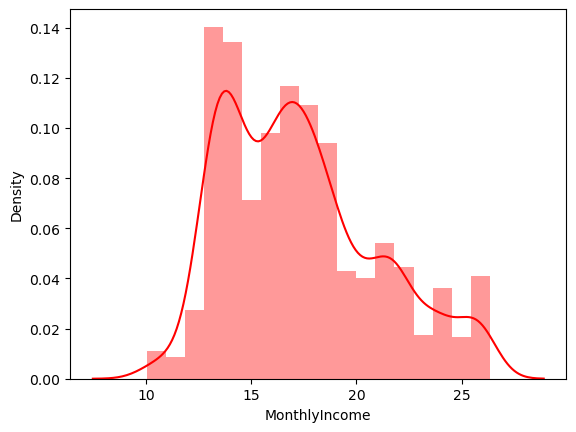

In [59]:
# we can see that skewness for monthlyincome reduced 
sns.distplot(data1['MonthlyIncome'],color='r')

In [60]:
data1.corr()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.015136,0.017386,0.031526,0.450766,0.020783,0.293453,0.015846,0.040942,0.651061,-0.028953,0.281352,0.197452,0.194344,0.177646
DailyRate,0.015136,1.000000,-0.007473,0.030075,0.014255,-0.024496,0.045435,0.024621,0.045299,0.023877,0.000448,-0.024348,0.015578,-0.027937,-0.021469
DistanceFromHome,0.017386,-0.007473,1.000000,0.028306,0.037295,0.030340,-0.025855,0.034007,0.047431,0.036012,-0.035664,0.030455,0.028564,0.027939,0.028128
HourlyRate,0.031526,0.030075,0.028306,1.000000,-0.010177,-0.014835,0.029291,-0.011738,0.053661,0.004391,-0.007363,-0.009572,-0.015521,-0.023226,-0.016005
MonthlyIncome,0.450766,0.014255,0.037295,-0.010177,1.000000,0.042789,0.157968,-0.005251,0.020266,0.712564,-0.036209,0.486873,0.397801,0.320375,0.351923
MonthlyRate,0.020783,-0.024496,0.030340,-0.014835,0.042789,1.000000,0.005513,-0.015427,-0.037527,0.017923,0.015689,-0.019391,-0.003914,0.005043,-0.030395
NumCompaniesWorked,0.293453,0.045435,-0.025855,0.029291,0.157968,0.005513,1.000000,-0.006225,0.033718,0.238543,-0.065267,-0.113531,-0.090301,-0.039946,-0.110867
PercentSalaryHike,0.015846,0.024621,0.034007,-0.011738,-0.005251,-0.015427,-0.006225,1.000000,0.001959,-0.003231,-0.010246,-0.032727,-0.000078,-0.011076,-0.005701
StockOptionLevel,0.040942,0.045299,0.047431,0.053661,0.020266,-0.037527,0.033718,0.001959,1.000000,0.013481,0.013782,0.026928,0.064090,0.024671,0.037248
TotalWorkingYears,0.651061,0.023877,0.036012,0.004391,0.712564,0.017923,0.238543,-0.003231,0.013481,1.000000,-0.044832,0.618711,0.467878,0.393146,0.450333


In [61]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in data1.columns:
    if data1[i].dtypes=='object':
        data1[i]=oe.fit_transform(data1[i].values.reshape(-1,1))
data1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2.0,1.0,2.0,0.0,...,0.0,1.0,0,8,0,0.0,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1.0,1.0,0.0,1.0,...,1.0,3.0,1,10,3,2.0,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2.0,4.0,3.0,1.0,...,0.0,2.0,0,7,3,2.0,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4.0,1.0,3.0,0.0,...,0.0,0.0,0,8,3,2.0,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1.0,3.0,1.0,1.0,...,0.0,3.0,1,6,3,2.0,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,2.0,3.0,0.0,1.0,...,0.0,0.0,1,17,3,2.0,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1.0,3.0,3.0,1.0,...,0.0,1.0,1,9,5,2.0,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,0.0,1.0,2.0,1.0,...,1.0,2.0,1,6,0,2.0,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,0.0,3.0,3.0,1.0,...,0.0,3.0,0,17,3,3.0,9,6,0,8


In [62]:
data1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2.0,1.0,2.0,0.0,...,0.0,1.0,0,8,0,0.0,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1.0,1.0,0.0,1.0,...,1.0,3.0,1,10,3,2.0,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2.0,4.0,3.0,1.0,...,0.0,2.0,0,7,3,2.0,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4.0,1.0,3.0,0.0,...,0.0,0.0,0,8,3,2.0,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1.0,3.0,1.0,1.0,...,0.0,3.0,1,6,3,2.0,2,2,2,2


In [63]:
data1.shape

(1407, 31)

In [64]:
data1.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [65]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1407 non-null   int64  
 1   Attrition                 1407 non-null   float64
 2   BusinessTravel            1407 non-null   float64
 3   DailyRate                 1407 non-null   int64  
 4   Department                1407 non-null   float64
 5   DistanceFromHome          1407 non-null   int64  
 6   Education                 1407 non-null   float64
 7   EducationField            1407 non-null   float64
 8   EnvironmentSatisfaction   1407 non-null   float64
 9   Gender                    1407 non-null   float64
 10  HourlyRate                1407 non-null   int64  
 11  JobInvolvement            1407 non-null   float64
 12  JobLevel                  1407 non-null   float64
 13  JobRole                   1407 non-null   float64
 14  JobSatis

In [66]:
# checking corelation between features and target
cor=data1.corr()

In [67]:
cor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.158143,0.009846,0.015136,-0.012878,0.017386,0.151448,-0.036129,0.008820,-0.041323,...,0.007208,0.025322,0.040942,0.651061,-0.028953,0.005260,0.281352,0.197452,0.194344,0.177646
Attrition,-0.158143,1.000000,-0.000950,-0.059282,0.056979,0.079373,-0.032142,0.023420,-0.027028,0.037067,...,0.003819,-0.024024,-0.136953,-0.174163,-0.053461,-0.058621,-0.151023,-0.177660,-0.034550,-0.160954
BusinessTravel,0.009846,-0.000950,1.000000,-0.008536,-0.006081,-0.022879,-0.025916,0.013709,0.030673,-0.035695,...,-0.014994,-0.026886,-0.017878,0.012983,0.017431,-0.004836,-0.029234,-0.017324,-0.038615,-0.033966
DailyRate,0.015136,-0.059282,-0.008536,1.000000,0.012169,-0.007473,0.028315,0.032170,0.008628,-0.004803,...,0.000863,0.023066,0.045299,0.023877,0.000448,0.030950,-0.024348,0.015578,-0.027937,-0.021469
Department,-0.012878,0.056979,-0.006081,0.012169,1.000000,0.018366,0.036289,0.003399,0.017467,-0.037606,...,-0.030106,0.005749,-0.005281,0.015631,0.037200,0.038767,0.037500,0.072034,0.057807,0.043618
DistanceFromHome,0.017386,0.079373,-0.022879,-0.007473,0.018366,1.000000,-0.001478,0.006930,-0.001396,-0.000757,...,0.021627,0.028457,0.047431,0.036012,-0.035664,0.020813,0.030455,0.028564,0.027939,0.028128
Education,0.151448,-0.032142,-0.025916,0.028315,0.036289,-0.001478,1.000000,-0.013714,0.005477,0.007462,...,0.003123,0.031784,0.024751,0.074534,-0.017083,-0.031355,0.068460,0.030854,0.022675,0.058473
EducationField,-0.036129,0.023420,0.013709,0.032170,0.003399,0.006930,-0.013714,1.000000,0.011619,0.004851,...,-0.003912,0.002868,-0.014218,-0.017553,0.061221,-0.001473,-0.006472,-0.007655,0.010423,-0.000384
EnvironmentSatisfaction,0.008820,-0.027028,0.030673,0.008628,0.017467,-0.001396,0.005477,0.011619,1.000000,0.026820,...,-0.029469,0.017572,-0.006895,-0.003517,-0.029550,0.009609,-0.018591,-0.000556,0.000331,0.000341
Gender,-0.041323,0.037067,-0.035695,-0.004803,-0.037606,-0.000757,0.007462,0.004851,0.026820,1.000000,...,-0.009349,0.040501,0.011041,-0.068675,-0.036901,-0.012225,-0.048159,-0.044882,-0.035957,-0.037153


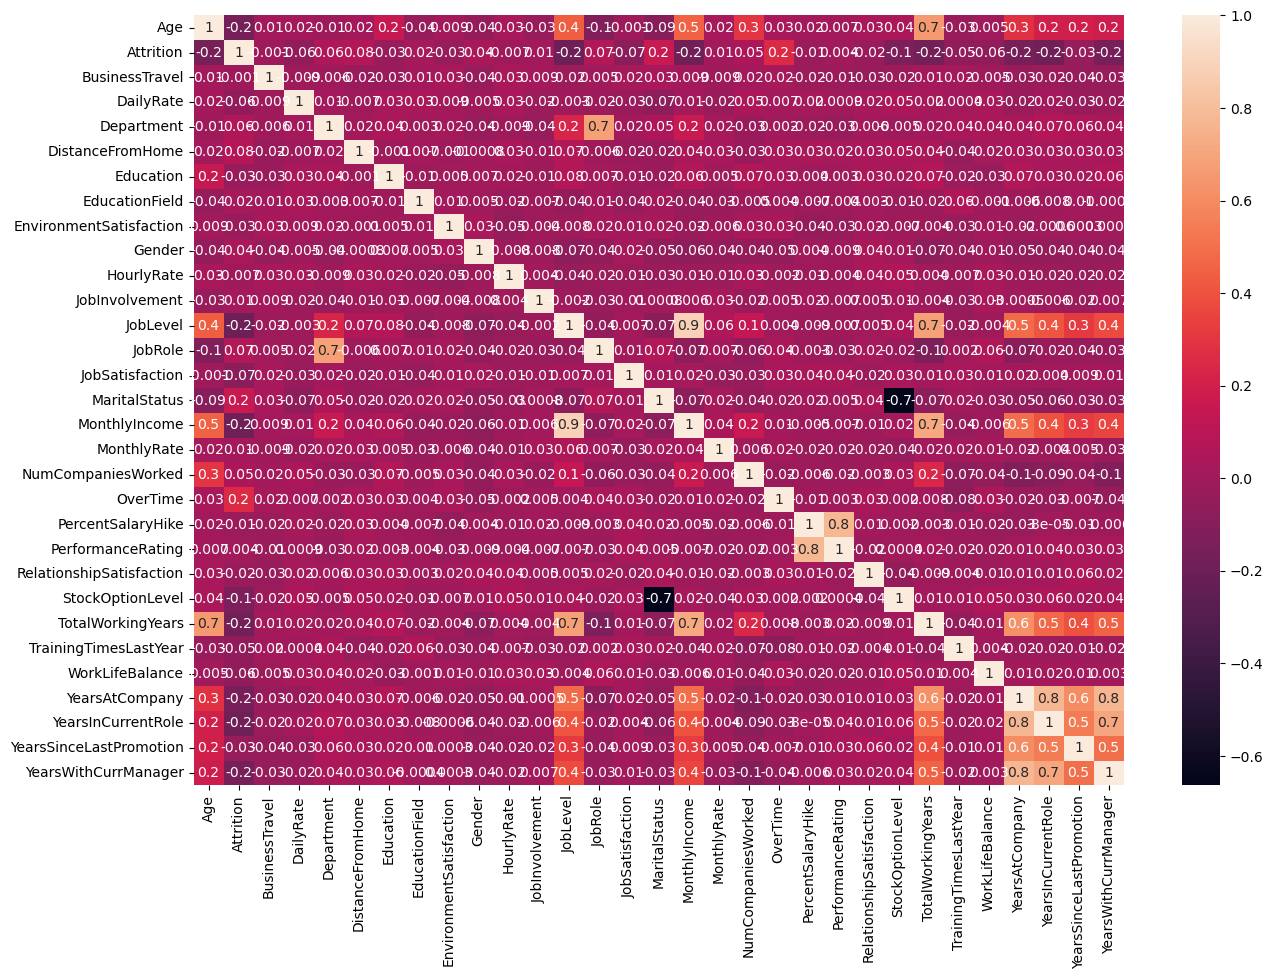

In [68]:
# visualising corelation matrics using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data1.corr(),annot=True,fmt='.1g')
plt.show()

In [69]:
x=data1.drop('Attrition',axis=1)
y=data1['Attrition']

In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [71]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.510883,0.597152,0.743371,1.388311,-1.018344,0.198783,-0.940030,0.422525,-1.217161,1.377471,...,-0.430513,-0.389363,-0.926170,-0.363065,-2.168614,-2.689150,-0.114965,-0.035514,-0.675068,0.287060
1,1.405623,-0.897853,-1.300355,-0.509992,-0.161254,-0.411889,-0.940030,-1.226552,0.821584,-0.244371,...,2.322812,1.265725,0.239412,-0.083845,0.157026,-0.022741,0.604748,0.821095,-0.349005,0.861998
2,0.063513,0.597152,1.416336,-0.509992,-0.895902,0.198783,1.310604,1.247063,0.821584,1.279177,...,-0.430513,0.438181,-0.926170,-0.502675,0.157026,-0.022741,-1.194534,-1.177660,-0.675068,-1.150284
3,-0.383858,-0.897853,1.463518,-0.509992,-0.773461,1.420129,-0.940030,1.247063,-1.217161,-0.490105,...,-0.430513,-1.216908,-0.926170,-0.363065,0.157026,-0.022741,0.244892,0.821095,0.303120,-1.150284
4,-1.054913,0.597152,-0.525577,-0.509992,-0.895902,-0.411889,0.560392,-0.402014,0.821584,-1.276453,...,-0.430513,1.265725,0.239412,-0.642285,0.157026,-0.022741,-0.834678,-0.606587,-0.022943,-0.575346


In [74]:
# lets use vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

In [75]:
vif

,VIF Values,features
0,1.904545,Age
1,1.013926,BusinessTravel
2,1.023610,DailyRate
3,2.189870,Department
4,1.018872,DistanceFromHome
5,1.040651,Education
6,1.012204,EducationField
7,1.012522,EnvironmentSatisfaction
8,1.024803,Gender
9,1.020268,HourlyRate


In [ ]:
# we can see that no multicolinearity problem for features 

In [76]:
y.value_counts()

0.0    1175
1.0     232
Name: Attrition, dtype: int64

In [77]:
# here we can see the data is not balanced hence its classification problem we will balance the data using oversampling method
# oversampling method
!pip install imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [78]:
y1.value_counts()

1.0    1175
0.0    1175
Name: Attrition, dtype: int64

In [ ]:
# we have done the following steps for building a classification M L problem
# import libraries
# do non graphical analysis
# do graphical analysis
#  univariate analysis
#  bivariate analysis
#  multivariate analysis
# encode categorical column
# check outliers if it present remove it
# check skewness if present remove it
# check multicolinearity if present revome
# apply features scaling method on numerical features
# apply resampling method to balance the class(classification method)
# also apply features selection methods

In [79]:
# model building 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print('best accuracy is ',maxaccu,'at random state ',maxrs)

best accuracy is  0.9680851063829787 at random state  29


In [80]:
# create train test split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=maxrs)

In [81]:
# randomForestclassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_RFC))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_RFC))
print("\nclassification report \n\n",classification_report(y_test,pred_RFC))

Accuracy score  0.951063829787234
confusion matrix 

 [[242  11]
 [ 12 205]]

classification report 

               precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       253
         1.0       0.95      0.94      0.95       217

    accuracy                           0.95       470
   macro avg       0.95      0.95      0.95       470
weighted avg       0.95      0.95      0.95       470



In [82]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_LR))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_LR))
print("\nclassification report \n\n",classification_report(y_test,pred_LR))

Accuracy score  0.7489361702127659
confusion matrix 

 [[176  77]
 [ 41 176]]

classification report 

               precision    recall  f1-score   support

         0.0       0.81      0.70      0.75       253
         1.0       0.70      0.81      0.75       217

    accuracy                           0.75       470
   macro avg       0.75      0.75      0.75       470
weighted avg       0.76      0.75      0.75       470



In [83]:
from sklearn.svm import SVC
SVM=SVC()
SVM.fit(x_train,y_train)
pred_SVM=SVM.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_SVM))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_SVM))
print("\nclassification report \n\n",classification_report(y_test,pred_SVM))

Accuracy score  0.9234042553191489
confusion matrix 

 [[225  28]
 [  8 209]]

classification report 

               precision    recall  f1-score   support

         0.0       0.97      0.89      0.93       253
         1.0       0.88      0.96      0.92       217

    accuracy                           0.92       470
   macro avg       0.92      0.93      0.92       470
weighted avg       0.93      0.92      0.92       470



In [84]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
pred_GBC=GBC.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_GBC))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_GBC))
print("\nclassification report \n\n",classification_report(y_test,pred_GBC))

Accuracy score  0.9425531914893617
confusion matrix 

 [[244   9]
 [ 18 199]]

classification report 

               precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       253
         1.0       0.96      0.92      0.94       217

    accuracy                           0.94       470
   macro avg       0.94      0.94      0.94       470
weighted avg       0.94      0.94      0.94       470



In [85]:
from sklearn.ensemble import AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_ABC))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_ABC))
print("\nclassification report \n\n",classification_report(y_test,pred_ABC))

Accuracy score  0.9
confusion matrix 

 [[224  29]
 [ 18 199]]

classification report 

               precision    recall  f1-score   support

         0.0       0.93      0.89      0.91       253
         1.0       0.87      0.92      0.89       217

    accuracy                           0.90       470
   macro avg       0.90      0.90      0.90       470
weighted avg       0.90      0.90      0.90       470



In [86]:
from sklearn.ensemble import BaggingClassifier
BAGG=BaggingClassifier()
BAGG.fit(x_train,y_train)
pred_BAGG=BAGG.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_BAGG))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_BAGG))
print("\nclassification report \n\n",classification_report(y_test,pred_BAGG))

Accuracy score  0.902127659574468
confusion matrix 

 [[232  21]
 [ 25 192]]

classification report 

               precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       253
         1.0       0.90      0.88      0.89       217

    accuracy                           0.90       470
   macro avg       0.90      0.90      0.90       470
weighted avg       0.90      0.90      0.90       470



In [87]:
from sklearn.ensemble import ExtraTreesClassifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_ETC))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_ETC))
print("\nclassification report \n\n",classification_report(y_test,pred_ETC))

Accuracy score  0.9744680851063829
confusion matrix 

 [[246   7]
 [  5 212]]

classification report 

               precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       253
         1.0       0.97      0.98      0.97       217

    accuracy                           0.97       470
   macro avg       0.97      0.97      0.97       470
weighted avg       0.97      0.97      0.97       470



In [88]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred_DT=DT.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_DT))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_DT))
print("\nclassification report \n\n",classification_report(y_test,pred_DT))

Accuracy score  0.8531914893617021
confusion matrix 

 [[207  46]
 [ 23 194]]

classification report 

               precision    recall  f1-score   support

         0.0       0.90      0.82      0.86       253
         1.0       0.81      0.89      0.85       217

    accuracy                           0.85       470
   macro avg       0.85      0.86      0.85       470
weighted avg       0.86      0.85      0.85       470



In [91]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_KNN))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_KNN))
print("\nclassification report \n\n",classification_report(y_test,pred_KNN))

Accuracy score  0.7468085106382979
confusion matrix 

 [[136 117]
 [  2 215]]

classification report 

               precision    recall  f1-score   support

         0.0       0.99      0.54      0.70       253
         1.0       0.65      0.99      0.78       217

    accuracy                           0.75       470
   macro avg       0.82      0.76      0.74       470
weighted avg       0.83      0.75      0.74       470



In [93]:
# cross validation score with RandomForest
from sklearn.model_selection import cross_val_score
score=cross_val_score(RFC,x1,y1)
print('accuracy score',accuracy_score(y_test,pred_RFC))
print(score)
print(score.mean())
print("The deference between accuracy score and cross validation score :", accuracy_score(y_test,pred_RFC)-score.mean())

accuracy score 0.951063829787234
[0.75319149 0.97446809 0.97446809 0.96382979 0.9787234 ]
0.9289361702127659
The deference between accuracy score and cross validation score : 0.02212765957446816


In [94]:
# cross validation score with lOGISTICregression
score1=cross_val_score(LR,x1,y1)
print('accuracy score',accuracy_score(y_test,pred_LR))
print(score1)
print(score1.mean())
print("The deference between accuracy score and cross validation score :", accuracy_score(y_test,pred_LR)-score1.mean())

accuracy score 0.7489361702127659
[0.76170213 0.74468085 0.74893617 0.75106383 0.77446809]
0.7561702127659574
The deference between accuracy score and cross validation score : -0.007234042553191489


In [95]:
# cross validation score with SVC
score2=cross_val_score(SVM,x1,y1)
print('accuracy score',accuracy_score(y_test,pred_SVM))
print(score2)
print(score2.mean())
print("The deference between accuracy score and cross validation score :", accuracy_score(y_test,pred_SVM)-score2.mean())G

accuracy score 0.9234042553191489
[0.85957447 0.92765957 0.95319149 0.91489362 0.90851064]
0.9127659574468086
The deference between accuracy score and cross validation score : 0.010638297872340385


In [96]:
# cross validation score with GradientBoosting
score3=cross_val_score(GBC,x1,y1)
print('accuracy score',accuracy_score(y_test,pred_GBC))
print(score3)
print(score3.mean())
print("The deference between accuracy score and cross validation score :", accuracy_score(y_test,pred_GBC)-score3.mean())

accuracy score 0.9425531914893617
[0.54680851 0.97234043 0.95106383 0.95531915 0.96808511]
0.8787234042553191
The deference between accuracy score and cross validation score : 0.06382978723404253


In [97]:
# cross validation score with AdaBoost
score4=cross_val_score(ABC,x1,y1)
print('accuracy score',accuracy_score(y_test,pred_ABC))
print(score4)
print(score4.mean())
print("The deference between accuracy score and cross validation score :", accuracy_score(y_test,pred_ABC)-score4.mean())

accuracy score 0.9
[0.6106383  0.92978723 0.94255319 0.90638298 0.95106383]
0.8680851063829789
The deference between accuracy score and cross validation score : 0.031914893617021156


In [98]:
# cross validation score with Bagging
score5=cross_val_score(BAGG,x1,y1)
print('accuracy score',accuracy_score(y_test,pred_BAGG))
print(score5)
print(score5.mean())
print("The deference between accuracy score and cross validation score :", accuracy_score(y_test,pred_BAGG)-score5.mean())

accuracy score 0.902127659574468
[0.72978723 0.95744681 0.95957447 0.93191489 0.95957447]
0.9076595744680851
The deference between accuracy score and cross validation score : -0.00553191489361704


In [99]:
# cross validation score with ExtraTreesClassifier
score6=cross_val_score(ETC,x1,y1)
print('accuracy score',accuracy_score(y_test,pred_ETC))
print(score6)
print(score6.mean())
print("The deference between accuracy score and cross validation score :", accuracy_score(y_test,pred_ETC)-score6.mean())

accuracy score 0.9744680851063829
[0.92765957 0.98297872 0.97659574 0.97659574 0.98085106]
0.9689361702127659
The deference between accuracy score and cross validation score : 0.00553191489361704


In [100]:
# cross validation score with DecisionTree
score7=cross_val_score(DT,x1,y1)
print('accuracy score',accuracy_score(y_test,pred_DT))
print(score7)
print(score7.mean())
print("The deference between accuracy score and cross validation score :", accuracy_score(y_test,pred_DT)-score7.mean())

accuracy score 0.8531914893617021
[0.72553191 0.88723404 0.90638298 0.87234043 0.9106383 ]
0.8604255319148937
The deference between accuracy score and cross validation score : -0.0072340425531916


In [101]:
# cross validation score with KNN
score8=cross_val_score(KNN,x1,y1)
print('accuracy score',accuracy_score(y_test,pred_KNN))
print(score8)
print(score8.mean())
print("The deference between accuracy score and cross validation score :", accuracy_score(y_test,pred_KNN)-score8.mean())

accuracy score 0.7468085106382979
[0.76170213 0.80425532 0.7787234  0.75531915 0.76808511]
0.7736170212765957
The deference between accuracy score and cross validation score : -0.02680851063829781


In [ ]:
# we can see that KNN model is the best performing model among the models because the deference between r2 score and cross validation score for KNN model is the least compared to other models

In [102]:
# hyper parametr tuning for KNN model
from sklearn.model_selection import GridSearchCV



In [103]:
param_grid={'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'metric':['euclidien','manhattan','minkowski'],'leaf_size':[20,30,40]}

In [104]:
grid_search=GridSearchCV(KNN,param_grid,cv=5,scoring='accuracy')

In [105]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40],
                         'metric': ['euclidien', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [106]:
grid_search.best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'metric': 'manhattan',
 'n_neighbors': 3,
 'weights': 'distance'}

In [108]:
model=KNeighborsClassifier(n_neighbors=3,weights='distance',algorithm='auto',metric='manhattan',leaf_size=20)

In [109]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('Accuracy score ',accuracy_score(y_test,pred)*100)

Accuracy score  88.08510638297872


In [ ]:
# before hyper parameters it was 77 ,after tuning getting  88 